### Setup

In [1]:
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
# Pkg.update()

    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`


    Updating registry at `C:\Users\domin\.julia\registries\General.toml`


   Resolving package versions...


    Updating `C:\Users\domin\.julia\environments\v1.9\Project.toml`
  [2528b1d8] ~ Dragoon v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main`
    Updating `C:\Users\domin\.julia\environments\v1.9\Manifest.toml`
  [2528b1d8] ~ Dragoon v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.0.0 `https://github.com/bergermann/Dragoon.jl.git#main`


Precompiling project...


  ✓ Dragoon
  1 dependency successfully precompiled in 7 seconds. 153 already precompiled.


In [2]:
using Dragoon
using Plots
# using Dates

In [3]:
ref0 = [
      0.6037533702979441 - 0.7971711659699691im,
    -0.49152420239804373 - 0.8708639150045079im,
     -0.9446107215621984 - 0.3281929077687685im,
     -0.9846694945053195 + 0.1744304634822827im,
     -0.8136139156426136 + 0.5814055351238824im,
     -0.4751750303984411 + 0.8798912946982941im,
    0.007749561940184724 + 0.9999699716940137im,
      0.5325698378687111 + 0.8463860630896989im,
      0.9042152260421181 + 0.4270770714913185im,
      0.9965552817110883 - 0.08293111897068542im,
];

ref1 = [
  0.9240607675676515 - 0.38224559885263165im,
  0.7380980822551304 - 0.674693427395952im,
  0.462948064022487 - 0.8863854071552547im,
  0.14786245633322903 - 0.9890079342488161im,
  -0.15586000240126052 - 0.9877791553031501im,
  -0.41490614421034666 - 0.9098642159665684im,
  -0.617404400711767 - 0.7866459216074747im,
  -0.7658156811116661 - 0.6430601391498648im,
  -0.8687939779605591 - 0.49517373098685186im,
  -0.9360561794775265 - 0.3518505774642497im,
  -0.9761192037376331 - 0.21723558662114203im,
  -0.9956895298891584 - 0.09274890872183986im,
  -0.9997664170139217 + 0.02161276037728511im,
  -0.9919648735330898 + 0.12651359482877816im,
  -0.9748503346892108 + 0.2228605504711954im,
  -0.9502174864493367 + 0.3115874330679862im,
  -0.9193032370696224 + 0.393549943861387im,
  -0.8829429833546631 + 0.46948023189991367im,
  -0.8416837189379979 + 0.5399708485415708im,
  -0.7958656259972035 + 0.6054732903737947im,
  -0.7456820601606868 + 0.6663019324259252im,
  -0.6912243153190141 + 0.7226402603728616im,
  -0.6325172274726643 + 0.7745462910312649im,
  -0.5695479277801538 + 0.8219581242139662im,
  -0.5022919227600631 + 0.8646981116725166im,
  -0.4307376970992456 + 0.9024771666350553im,
  -0.35491058222663224 + 0.9349002506275896im,
  -0.2748980884521972 + 0.9614733698679944im,
  -0.19087567409544032 + 0.9816142200674294im,
  -0.10313357313905225 + 0.9946675153495173im,
  -0.012103106793501572 + 0.9999267547205412im,
  0.08161873838943179 + 0.9966636250730342im,
  0.1772493286384882 + 0.9841659796483582im,
  0.27380786206107666 + 0.9617844117439002im,
  0.3701142439384575 + 0.9289862466333114im,
  0.46480279904208954 + 0.8854142296138187im,
  0.5563540269667009 + 0.8309453632327204im,
  0.6431457015941184 + 0.7657438256499466im,
  0.7235225589439993 + 0.6903007364179202im,
  0.7958805407946918 + 0.6054536850861058im,
  0.8587587180131229 + 0.512380195008022im,
  0.9109293743169278 + 0.4125623286323685im,
  0.9514758477257652 + 0.307723432962967im,
  0.9798484268083656 + 0.1997424854185147im,
  0.9958914606454912 + 0.09055494803379414im,
  0.9998389086057622 - 0.017948728033846926im,
  0.992280221622198 - 0.12401597388001956im,
  0.9741024265108893 - 0.2261071928657065im,
  0.946416901645635 - 0.32294743888049116im,
  0.9104801519376988 - 0.41355276921755146im,
]
;

In [18]:
n = 20

initdist = findpeak(22.025e9,n)

freqs = genFreqs(22.025e9,50e6; length=50)
freqsplot = genFreqs(22.025e9,150e6; length=1000)

booster = AnalyticalBooster(initdist)

hist = initHist(booster,10000,freqs,ObjRef(ref1,x->x^2))
;

Objective Value: 105.7, Timestamp: 0000-01-01T00:00:00


In [19]:
trace = linesearch(booster,hist,freqs,booster.vmotor*1e-3,
                    ObjRef(ref1,x->x^2),
                    SolverSteep,
                    Derivator1(1e-6,"double"),
                    StepNorm("unit"),
                    SearchExtendedSteps(2000),
                    UnstuckDont;
                    ϵgrad=0.,maxiter=Int(1000),showtrace=true,showevery=10);

Gradient norm: 254000.0


Gradient norm: 41100.0


Gradient norm: 

109000.0
Gradient norm: 87400.0


Gradient norm: 120000.0


Gradient norm: 566000.0


Gradient norm: 146000.0


Gradient norm: 481000.0


Gradient norm: 145000.0


Gradient norm: 368000.0


Iter: 10, timestamp: 12 seconds
Iter finished. Steps: 85, Objective value: 36.809

Gradient norm: 140000.0


Gradient norm: 303000.0


Gradient norm: 135000.0


Gradient norm: 256000.0


Gradient norm: 130000.0


Gradient norm: 229000.0


Gradient norm: 125000.0


Gradient norm: 210000.0


Gradient norm: 121000.0


Gradient norm: 190000.0


Iter: 20, timestamp: 29 seconds
Iter finished. Steps: 47, Objective value: 29.381

Gradient norm: 117000.0


Gradient norm: 174000.0


Gradient norm: 113000.0


Gradient norm: 159000.0


Gradient norm: 109000.0


Gradient norm: 149000.0


Gradient norm: 105000.0


Gradient norm: 139000.0


Gradient norm: 102000.0


Gradient norm: 

130000.0
Iter: 30, timestamp: 47 seconds
Iter finished. Steps: 35, Objective value: 26.316

Gradient norm: 97600.0


Gradient norm: 125000.0


Gradient norm: 95000.0


Gradient norm: 118000.0


Gradient norm: 93100.0


Gradient norm: 111000.0


Gradient norm: 91300.0


Gradient norm: 104000.0


Gradient norm: 89500.0


Gradient norm: 98400.0


Iter: 40, timestamp: 1 minute, 5 seconds
Iter finished. Steps: 31, Objective value: 24.507

Gradient norm: 90100.0


Gradient norm: 93300.0


Gradient norm: 87500.0


Gradient norm: 90400.0


Gradient norm: 87600.0


Gradient norm: 87700.0


Gradient norm: 87700.0


Gradient norm: 87700.0


Gradient norm: 87700.0


Gradient norm: 84700.0
Iter: 

50, timestamp: 1 minute, 23 seconds
Iter finished. Steps: 31, Objective value: 23.166

Gradient norm: 90500.0


Gradient norm: 84400.0


Gradient norm: 90300.0


Gradient norm: 84500.0


Gradient norm: 93000.0


Gradient norm: 87100.0


Gradient norm: 95900.0


Gradient norm: 87000.0


Gradient norm: 104000.0


Gradient norm: 88900.0


Iter: 60, timestamp: 1 minute, 41 seconds
Iter finished. Steps: 39, Objective value: 21.723

Gradient norm: 111000.0


Gradient norm: 94000.0


Gradient norm: 119000.0


Gradient norm: 102000.0


Gradient norm: 128000.0


Gradient norm: 111000.0


Gradient norm: 147000.0


Gradient norm: 124000.0


Gradient norm: 174000.0


Gradient norm: 146000.0


Iter: 70, timestamp: 1 minute, 58 seconds
Iter finished. Steps: 78, Objective value: 18.638

Gradient norm: 218000.0


Gradient norm: 

181000.0
Gradient norm: 305000.0


Gradient norm: 266000.0


Gradient norm: 489000.0


Gradient norm: 461000.0


Gradient norm: 246000.0


Gradient norm: 99300.0


Gradient norm: 223000.0


Gradient norm: 85200.0


Iter: 80, timestamp: 2 minutes, 14 seconds
Iter finished. Steps: 99, Objective value: 2.785

Gradient norm: 215000.0


Gradient norm: 72800.0


Gradient norm: 184000.0


Gradient norm: 63600.0


Gradient norm: 147000.0


Gradient norm: 58900.0


Gradient norm: 108000.0


Gradient norm: 53500.0


Gradient norm: 101000.0


Gradient norm: 50600.0


Iter: 90, timestamp: 2 minutes, 31 seconds
Iter finished. Steps: 25, Objective value: 1.058

Gradient norm: 85400.0


Gradient norm: 47700.0


Gradient norm: 74700.0


Gradient norm: 

47100.0
Gradient norm: 65300.0


Gradient norm: 45800.0


Gradient norm: 59300.0


Gradient norm: 43000.0


Gradient norm: 55200.0


Gradient norm: 39700.0


Iter: 100, timestamp: 2 minutes, 47 seconds
Iter finished. Steps: 15, Objective value: 0.669

Gradient norm: 57400.0


Gradient norm: 37800.0


Gradient norm: 54300.0


Gradient norm: 34200.0


Gradient norm: 54400.0


Gradient norm: 33000.0


Gradient norm: 49200.0


Gradient norm: 30300.0


Gradient norm: 50200.0


Gradient norm: 28800.0


Iter: 110, timestamp: 3 minutes, 4 seconds
Iter finished. Steps: 13, Objective value: 0.439

Gradient norm: 47600.0


Gradient norm: 29000.0


Gradient norm: 40000.0


Gradient norm: 27300.0


Gradient norm: 35700.0


Gradient norm: 28400.0


Gradient norm: 29300.0


Gradient norm: 29500.0


Gradient norm: 25400.0


Gradient norm: 32900.0


Iter: 120, timestamp: 3 minutes, 20 seconds
Iter finished. Steps: 6, Objective value: 0.319

Gradient norm: 24200.0


Gradient norm: 28700.0


Gradient norm: 25100.0


Gradient norm: 25300.0


Gradient norm: 25300.0


Gradient norm: 25400.0


Gradient norm: 21200.0


Gradient norm: 

28600.0
Gradient norm: 19900.0


Gradient norm: 28200.0


Iter: 130, timestamp: 3 minutes, 36 seconds
Iter finished. Steps: 5, Objective value: 0.246

Gradient norm: 19600.0


Gradient norm: 24700.0


Gradient norm: 20600.0


Gradient norm: 21100.0


Gradient norm: 21200.0


Gradient norm: 17000.0
Gradient norm: 23600.0


Gradient norm: 15900.0


Gradient norm: 23000.0


Gradient norm: 15800.0


Iter: 140, timestamp: 3 minutes, 53 seconds
Iter finished. Steps: 5, Objective value: 0.196

Gradient norm: 20000.0


Gradient norm: 16500.0


Gradient norm: 16900.0


Gradient norm: 16900.0


Gradient norm: 16900.0


Gradient norm: 16900.0


Gradient norm: 16900.0


Gradient norm: 17000.0


Gradient norm: 12800.0


Gradient norm: 22500.0


Iter: 150, timestamp: 4 minutes, 9 seconds
Iter finished. Steps: 3, Objective value: 0.163

Gradient norm: 10900.0


Gradient norm: 34600.0


Gradient norm: 9410.0


Gradient norm: 16100.0


Gradient norm: 6400.0


Gradient norm: 14400.0


Gradient norm: 9590.0


Gradient norm: 7920.0


Gradient norm: 8340.0


Gradient norm: 8290.0


Iter: 160, timestamp: 4 minutes, 26 seconds
Iter finished. Steps: 2, Objective value: 0.067

Gradient norm: 8290.0


Gradient norm: 8290.0


Gradient norm: 8280.0


Gradient norm: 8280.0


Gradient norm: 8270.0


Gradient norm: 8270.0


Gradient norm: 8270.0


Gradient norm: 8260.0


Gradient norm: 8260.0


Gradient norm: 4800.0


Iter: 170, timestamp: 4 minutes, 40 seconds
Iter finished. Steps: 122, Objective value: 0.031

Gradient norm: 16200.0


Gradient norm: 4610.0


Gradient norm: 10700.0


Gradient norm: 5440.0


Gradient norm: 6510.0


Gradient norm: 3810.0


Gradient norm: 12000.0


Gradient norm: 4720.0


Gradient norm: 3900.0


Gradient norm: 7140.0


Iter: 180, timestamp: 4 minutes, 57 seconds
Iter finished. Steps: 1, Objective value: 0.023

Gradient norm: 3200.0


Gradient norm: 15000.0


Gradient norm: 2730.0


Gradient norm: 9970.0


Gradient norm: 3660.0


Gradient norm: 3310.0


Gradient norm: 3860.0


Gradient norm: 3860.0


Gradient norm: 3860.0


Gradient norm: 3860.0


Iter: 190, timestamp: 5 minutes, 14 seconds
Iter finished. Steps: 1, Objective value: 0.017

Gradient norm: 3860.0


Gradient norm: 3860.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0
Gradient norm: 

3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Iter: 200, timestamp: 5 minutes, 31 seconds
Iter finished. Steps: 1, Objective value: 0.016

Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Gradient norm: 3850.0


Iter: 210, timestamp: 5 minutes, 48 seconds
Iter finished. Steps: 1, Objective value: 0.015

Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Iter: 220, timestamp: 6 minutes, 5 seconds
Iter finished. Steps: 1, Objective value: 0.014

Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3840.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0
Iter: 

230, timestamp: 6 minutes, 21 seconds
Iter finished. Steps: 1, Objective value: 0.013

Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3830.0


Gradient norm: 3820.0


Iter: 240, timestamp: 6 minutes, 38 seconds
Iter finished. Steps: 1, Objective value: 0.012

Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Iter: 250, timestamp: 6 minutes, 54 seconds
Iter finished. Steps: 1, Objective value: 0.011

Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3820.0


Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 3810.0


Iter: 260, timestamp: 7 minutes, 11 seconds
Iter finished. Steps: 1, Objective value: 0.01

Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 

3810.0
Gradient norm: 3810.0


Gradient norm: 3810.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Iter: 270, timestamp: 7 minutes, 27 seconds
Iter finished. Steps: 1, Objective value: 0.009

Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Iter: 280, timestamp: 7 minutes, 44 seconds
Iter finished. Steps: 1, Objective value: 0.009

Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3800.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Iter: 290, timestamp: 8 minutes, 1 second
Iter finished. Steps: 1, Objective value: 0.008

Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Gradient norm: 3790.0


Iter: 300, timestamp: 8 minutes, 17 seconds
Iter finished. Steps: 1, Objective value: 0.008

Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Iter: 310, timestamp: 8 minutes, 34 seconds
Iter finished. Steps: 1, Objective value: 0.007

Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3780.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Iter: 320, timestamp: 8 minutes, 51 seconds
Iter finished. Steps: 1, Objective value: 0.007

Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Iter: 330, timestamp: 9 minutes, 8 seconds
Iter finished. Steps: 1, Objective value: 0.006

Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3770.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Iter: 340, timestamp: 9 minutes, 25 seconds
Iter finished. Steps: 1, Objective value: 0.006

Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Iter: 350, timestamp: 9 minutes, 42 seconds
Iter finished. Steps: 1, Objective value: 0.006

Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3760.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Iter: 360, timestamp: 10 minutes
Iter finished. Steps: 1, Objective value: 0.005

Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Iter: 370, timestamp: 10 minutes, 17 seconds
Iter finished. Steps: 1, Objective value: 0.005

Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3750.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 

3740.0
Gradient norm: 3740.0


Gradient norm: 3740.0


Iter: 380, timestamp: 10 minutes, 34 seconds
Iter finished. Steps: 1, Objective value: 0.005

Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0
Gradient norm: 

3740.0


Gradient norm: 3740.0


Iter: 390, timestamp: 10 minutes, 52 seconds
Iter finished. Steps: 1, Objective value: 0.004

Gradient norm: 

3740.0
Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3740.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Iter: 400, timestamp: 11 minutes, 9 seconds
Iter finished. Steps: 1, Objective value: 0.004

Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 

3730.0
Iter: 410, timestamp: 11 minutes, 26 seconds
Iter finished. Steps: 1, Objective value: 0.004

Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3730.0


Gradient norm: 3720.0


Iter: 420, timestamp: 11 minutes, 44 seconds
Iter finished. Steps: 1, Objective value: 0.004

Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0
Gradient norm: 

3720.0


Gradient norm: 3720.0


Iter: 430, timestamp: 12 minutes, 1 second
Iter finished. Steps: 1, Objective value: 0.003

Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Iter: 440, timestamp: 12 minutes, 19 seconds
Iter finished. Steps: 1, Objective value: 0.003

Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3720.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Iter: 450, timestamp: 12 minutes, 36 seconds
Iter finished. Steps: 1, Objective value: 0.003

Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Iter: 460, timestamp: 12 minutes, 54 seconds
Iter finished. Steps: 1, Objective value: 0.003

Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0
Gradient norm: 

3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Iter: 470, timestamp: 13 minutes, 11 seconds
Iter finished. Steps: 1, Objective value: 0.003

Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3710.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Iter: 480, timestamp: 13 minutes, 29 seconds
Iter finished. Steps: 1, Objective value: 0.003

Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Iter: 490, timestamp: 13 minutes, 47 seconds
Iter finished. Steps: 1, Objective value: 0.002

Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3700.0


Iter: 500, timestamp: 14 minutes, 4 seconds
Iter finished. Steps: 1, Objective value: 0.002

Gradient norm: 3700.0


Gradient norm: 

3700.0
Gradient norm: 3700.0


Gradient norm: 3700.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Iter: 510, timestamp: 14 minutes, 22 seconds
Iter finished. Steps: 1, Objective value: 0.002

Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Iter: 520, timestamp: 14 minutes, 39 seconds
Iter finished. Steps: 1, Objective value: 0.002

Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Iter: 530, timestamp: 14 minutes, 57 seconds
Iter finished. Steps: 1, Objective value: 0.002

Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


Gradient norm: 3690.0


No unstucking tried. Terminating.
Terminated. 539 Iterations.
Final objective value: 0.002
Elapsed movement time:  15 minutes, 14 seconds
Summed movement time:   2 hours, 16 minutes, 16 seconds
Elapsed computing time: 7 minutes, 22 seconds, 697 milliseconds


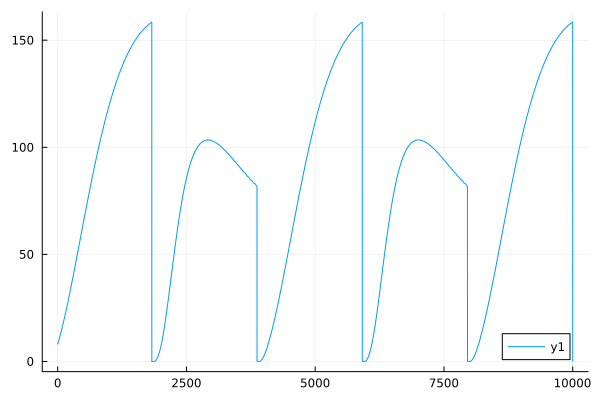

In [25]:
plot(reverse((x->x.objvalue).(hist[1:10000])))

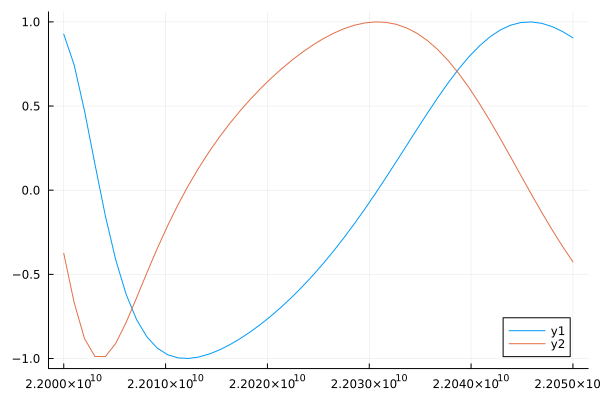

In [20]:
plot(freqs,real(getRef1d(booster,freqs)))
plot!(freqs,imag(getRef1d(booster,freqs)))

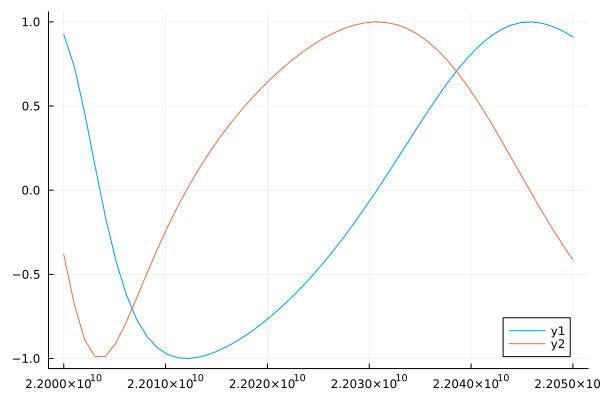

In [21]:
plot(freqs,real(ref1))
plot!(freqs,imag(ref1))

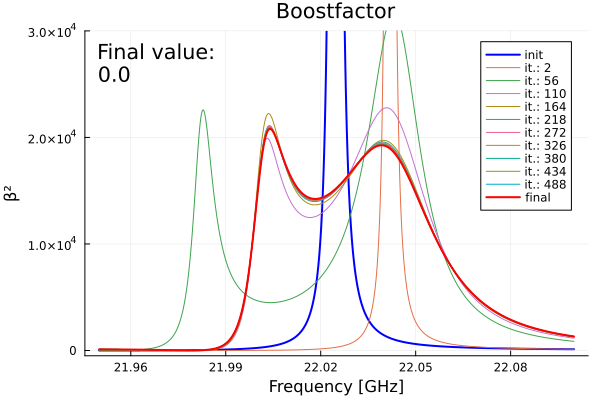

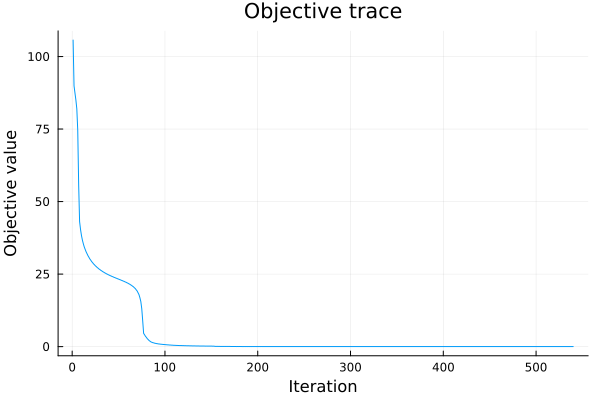

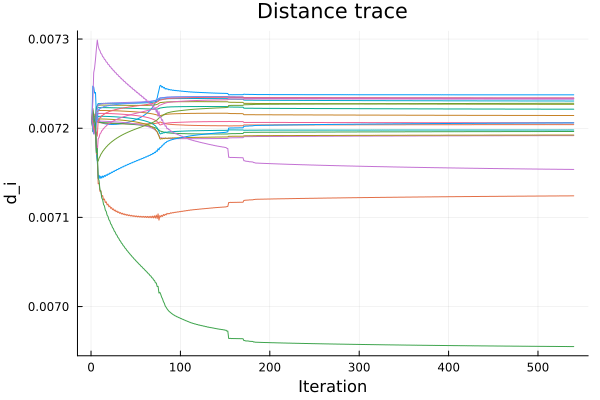

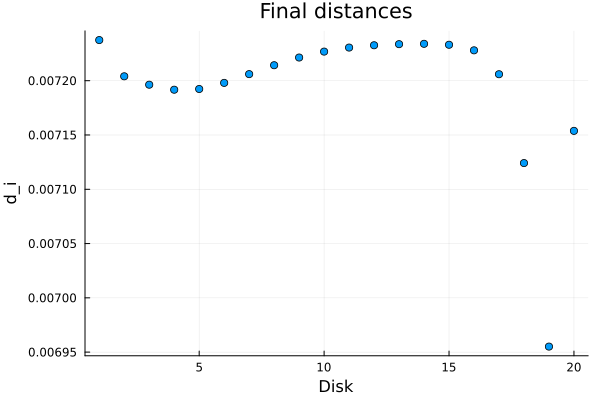

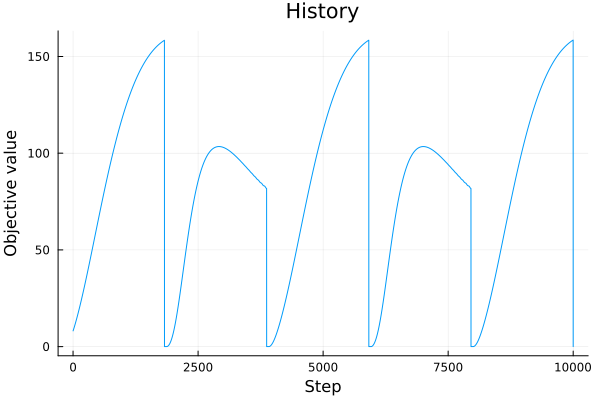

(Plot{Plots.GRBackend() n=12}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1})

In [24]:
analyse(hist,trace,freqsplot; div=10)

In [10]:
#number of discs in the booster
n = 20

#initial disc configuration
#findpeak tries to find an equidistant configuration with a peak at f
initdist = findpeak(22.025e9,n)

#generate frequencies for calculation and for plotting
freqs = genFreqs(22.025e9,50e6; length=10) #optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; length=1000)

#initialize physical properties of the booster
booster = AnalyticalBooster(initdist)
# booster.timestamp = DateTime(0)
#=
Booster(
    pos,              disc positions
    ndisk,            disc number
    thickness,        disc thickness
    epsilon,          disc epsilon
    vmotor,           motor speed
    maxlength,        maximum allowed booster length (not implemented yet)
    timestamp,        booster operation time
    summedtraveltime, summed motor operation time
    codetimestamp     code runtime
)
=#

#initialize storage of measurements
hist = initHist(booster,10000,freqs,ObjAnalytical)
#                           ^ length, should be at least the larger of (n^2, search steps)
;

Objective Value: -243.3, Timestamp: 0000-01-01T00:00:00


### Optimizer

In [11]:
#=
how to use

linesearch(                     directly modifies booster.pos
    booster,                    
    hist,                       
    freqs,                      frequency range to optimize on
    α,                          base step length e.g. motorspeed*measurementfrequency
    (objective,[options]),      objective function
    (solver,[options]),         provides step direction p
    (derivative,[options]),     provides derivatives for use by solver
    (step,[options]),           calculates steplength
    (search,[options]),         search mode
    (unstuckinator,[options]);  tries to unstuck system from bad local minima
    ϵgrad=0,                    terminate if norm(gradient) falls below this value,
    maxiter=100,                maximum allowed iterations,
    showtrace=false,            wether to print progress,
    showevery=1,                only print every i iterations,
    unstuckisiter=true          wether an unstucking iteration counts towards maxiter
                                    warning! can run endlessly if false
)

returns trace, access with
trace[iteration].x      disc position
                .obj    objective value
                .g      gradient
                .h      hessian
                .t      timestamp
                .T      summed travel time
=#

In [12]:
trace = linesearch(booster,hist,freqs,booster.vmotor*1e-3,
                    ObjAnalytical,
                    SolverNewton("inv"),
                    Derivator2(1e-5,1e-6,"double"),
                    StepNorm("unit"),
                    SearchExtendedSteps(2000),
                    UnstuckDont;
                    ϵgrad=0.,maxiter=Int(1e2),showtrace=true);

Gradient norm: 4.69e6


Iter: 1, timestamp: 23 seconds
Iter finished. Steps: 0, Objective value: -243.302

Stuck. Trying to unstuck.

No unstucking tried. Terminating.
Terminated. 1 Iterations.
Final objective value: -243.302
Elapsed movement time:  24 seconds
Summed movement time:   41 seconds
Elapsed computing time: 607 milliseconds


In [13]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

20-element Vector{Float64}:
 0.007209715011297335
 0.01541943002259467
 0.023629145033892004
 0.03183886004518935
 0.040048575056486686
 0.04825829006778402
 0.056468005079081354
 0.06467772009037867
 0.07288743510167602
 0.08109715011297335
 0.08930686512427066
 0.09751658013556799
 0.10572629514686532
 0.11393601015816265
 0.12214572516945998
 0.13035544018075737
 0.13856515519205467
 0.1467748702033521
 0.1549845852146494
 0.16319430022594672

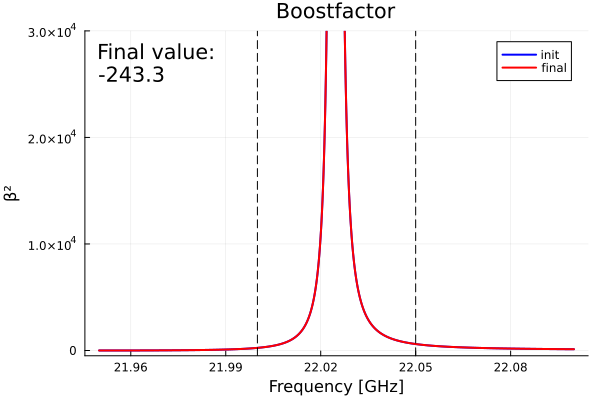

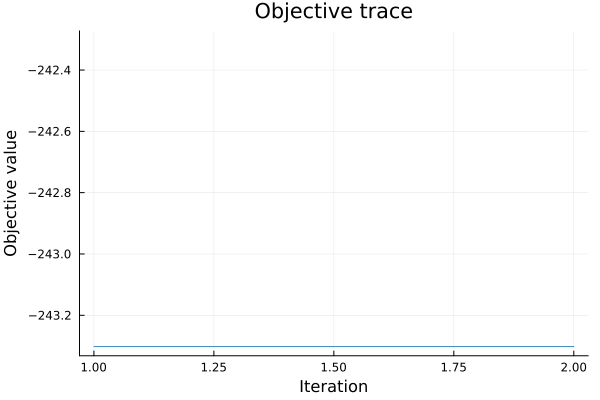

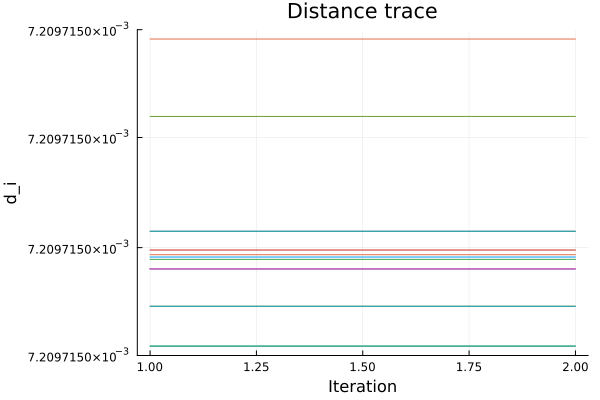

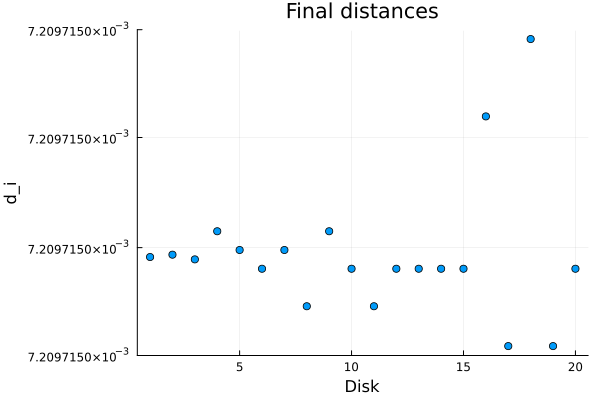

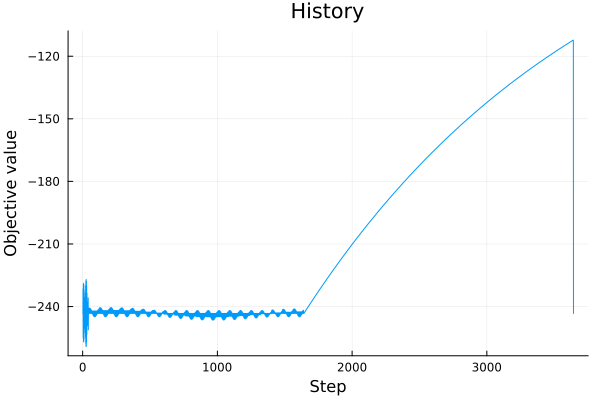

GKS: Possible loss of precision in routine SET_WINDOW


(Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1})

In [14]:
#get handy output
plt = analyse(hist,trace,freqsplot; freqs=freqs,div=10)

#savefig(plt[i],"cool_epic_result_wow.svg")